In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 359.8 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54590 sha256=9c10df5f51b185381133c09cafca43572ed57a40d764191b1db89c01e5db88ff
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from shapely.ops import polygonize
from shapely.geometry import Polygon, LineString, MultiLineString, MultiPolygon, mapping

import folium

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
il_shp_path = "../input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.shp"
il_shp = gpd.read_file(il_shp_path)

In [4]:
kongeo = [] #konya
ispgeo = [] #ısparta
ankgeo = [] #ankara
aksgeo = [] #aksaray
niggeo = [] #niğde
nevgeo = [] #nevşehir
kirgeo = [] #kırşehir
kargeo = [] #karaman
mergeo = [] #mersin
antgeo = [] #antalya

In [5]:
for i in range(len(il_shp)):
    if il_shp["il"][i] == "Konya":
        kongeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Isparta":
        ispgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Ankara":
        ankgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Aksaray":
        aksgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Nigde":
        niggeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Nevsehir":
        nevgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Kirsehir":
        kirgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Karaman":
        kargeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Mersin":
        mergeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Antalya":
        antgeo.append(il_shp["geometry"][i])

In [6]:
nigde = gpd.GeoDataFrame( {"il" : "Nigde_il", "geometry" : niggeo}, crs = "EPSG:4326")
mersin = gpd.GeoDataFrame( {"il" : "Mersin_il", "geometry" : mergeo}, crs = "EPSG:4326")
konya = gpd.GeoDataFrame( {"il" : "Konya_il", "geometry" : kongeo}, crs = "EPSG:4326")
karaman = gpd.GeoDataFrame( {"il" : "Karaman_il", "geometry" : kargeo}, crs = "EPSG:4326")
antalya = gpd.GeoDataFrame( {"il" : "Antalya_il", "geometry" : antgeo}, crs = "EPSG:4326")
isparta = gpd.GeoDataFrame( {"il" : "Isparta_il", "geometry" : ispgeo}, crs = "EPSG:4326")
ankara = gpd.GeoDataFrame( {"il" : "Ankara_il", "geometry" : ankgeo}, crs = "EPSG:4326")
nevsehir = gpd.GeoDataFrame( {"il" : "Nevsehir_il", "geometry" : nevgeo}, crs = "EPSG:4326")
kirsehir = gpd.GeoDataFrame( {"il" : "Kirsehir_il", "geometry" : kirgeo}, crs = "EPSG:4326")
aksaray = gpd.GeoDataFrame( {"il" : "Aksaray_il", "geometry" : aksgeo}, crs = "EPSG:4326")

tekeriller = [nigde, mersin, konya, karaman, antalya, isparta, ankara, nevsehir,
             kirsehir, aksaray]

In [7]:
nbalist = os.listdir("../input/2204-d-havza-ndvi-l5")
nbalist.sort()
nbalist

['Havza_2000_ndvi.tif',
 'Havza_2001_ndvi.tif',
 'Havza_2002_ndvi.tif',
 'Havza_2003_ndvi.tif',
 'Havza_2004_ndvi.tif',
 'Havza_2005_ndvi.tif',
 'Havza_2006_ndvi.tif',
 'Havza_2007_ndvi.tif',
 'Havza_2008_ndvi.tif',
 'Havza_2009_ndvi.tif',
 'Havza_2010_ndvi.tif',
 'Havza_2011_ndvi.tif',
 '__notebook__.ipynb',
 '__output__.json',
 '__results__.html',
 '__results___files',
 'custom.css']

In [8]:
nbalist = nbalist[:-5]
nbalist

['Havza_2000_ndvi.tif',
 'Havza_2001_ndvi.tif',
 'Havza_2002_ndvi.tif',
 'Havza_2003_ndvi.tif',
 'Havza_2004_ndvi.tif',
 'Havza_2005_ndvi.tif',
 'Havza_2006_ndvi.tif',
 'Havza_2007_ndvi.tif',
 'Havza_2008_ndvi.tif',
 'Havza_2009_ndvi.tif',
 'Havza_2010_ndvi.tif',
 'Havza_2011_ndvi.tif']

In [9]:
for year in range(2000,2012):
    os.mkdir("./Year"+str(year))

In [10]:
def clippingiller(bandlist):
    for uydu in bandlist:
        inpath = os.path.join("../input/2204-d-havza-ndvi-l5", uydu)
        year = uydu[6:10]
        
        img_arr = rxr.open_rasterio(inpath, masked=True).squeeze()
        img_arr = img_arr.rio.reproject("EPSG:4326")
        
        for gdf in tekeriller:
            #Bazen görüntü içerisinde bazı illere ait görüntüler yer almayabilir.
            try:
                clipped = img_arr.rio.clip(gdf.geometry.apply(mapping))
            except ValueError:
                continue
            il = list(enumerate(gdf.il))[0][1]
            outpath = os.path.join("./Year"+year, il+"_"+year+"_"+"ndvi.tif")
            clipped.rio.to_raster(outpath)
            
        print("****************** Yıl {} bitti *********************".format(year))

In [11]:
clippingiller(nbalist)

/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2000 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2001 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2002 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2003 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2004 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2005 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2006 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2007 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2008 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2009 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2010 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2011 bitti *********************


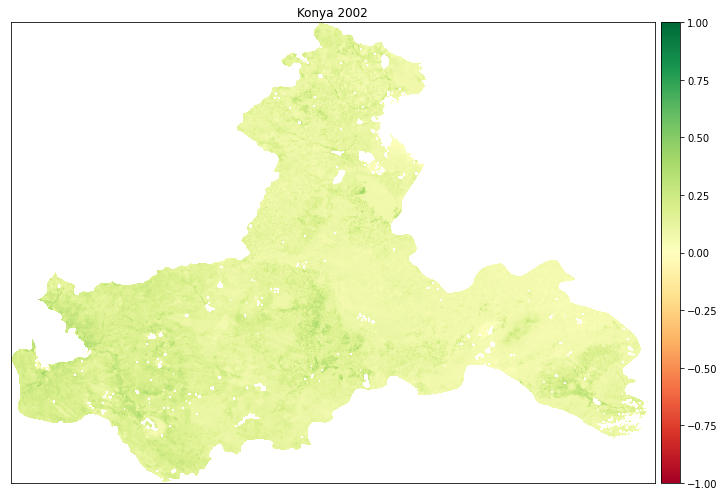

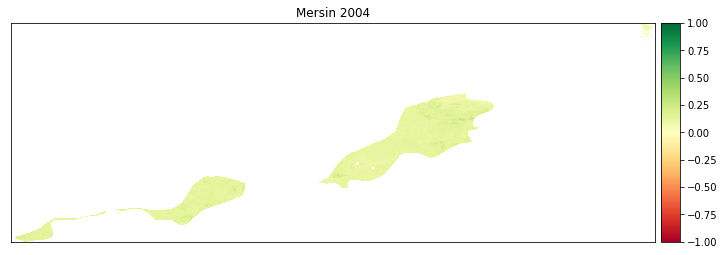

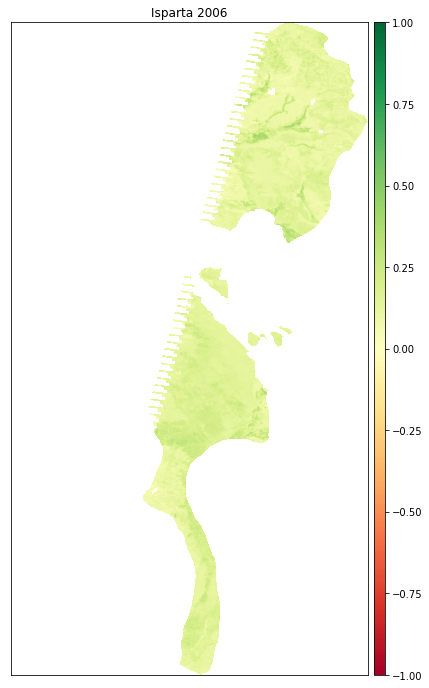

In [12]:
konyadene = rxr.open_rasterio("./Year2002/Konya_il_2002_ndvi.tif", masked = True).squeeze()
mersidene = rxr.open_rasterio("./Year2004/Mersin_il_2004_ndvi.tif", masked = True).squeeze()
ispardene = rxr.open_rasterio("./Year2006/Isparta_il_2006_ndvi.tif", masked = True).squeeze()
ep.plot_bands(konyadene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Konya 2002")
ep.plot_bands(mersidene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Mersin 2004")
ep.plot_bands(ispardene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Isparta 2006")
plt.show()

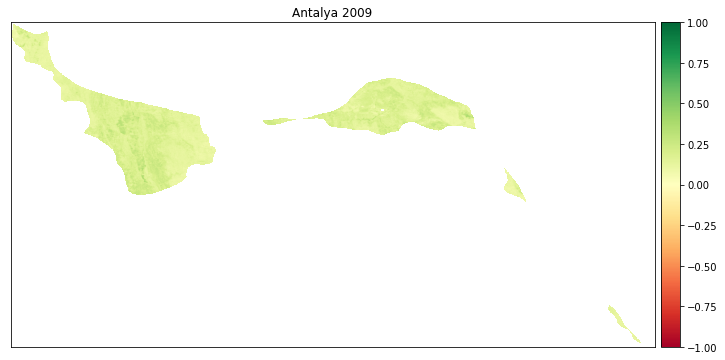

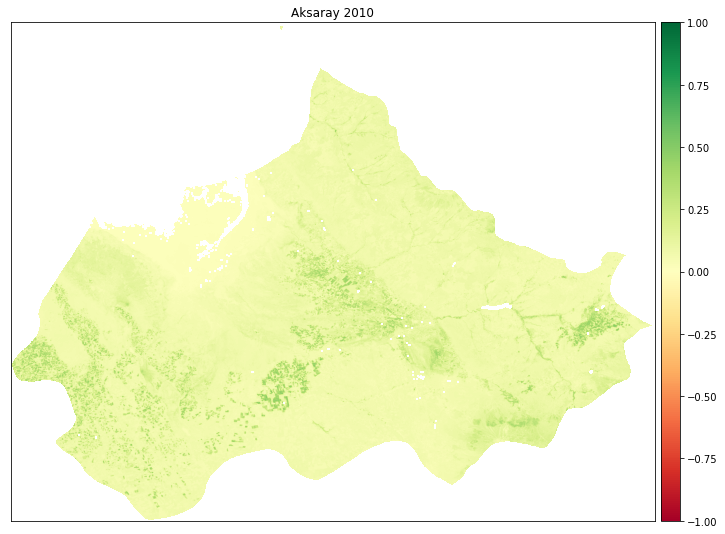

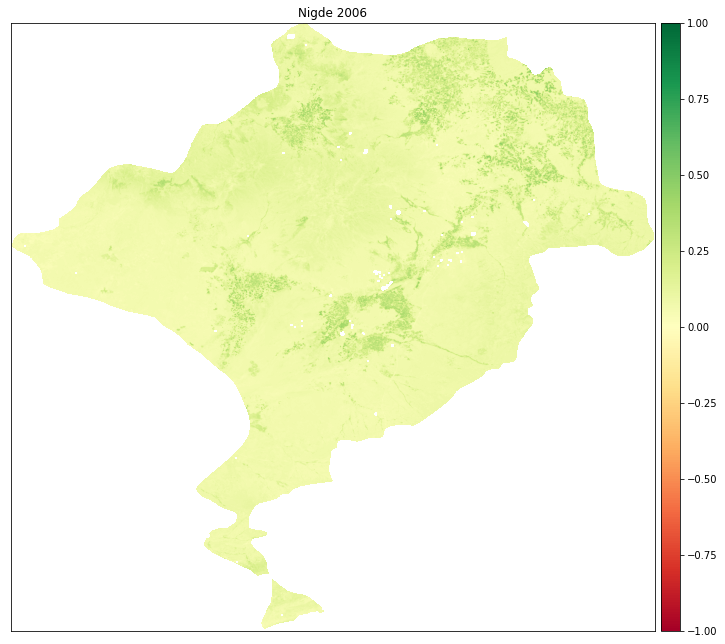

In [13]:
antaldene = rxr.open_rasterio("./Year2009/Antalya_il_2009_ndvi.tif", masked = True).squeeze()
aksadene = rxr.open_rasterio("./Year2010/Aksaray_il_2010_ndvi.tif", masked = True).squeeze()
karadene = rxr.open_rasterio("./Year2006/Nigde_il_2006_ndvi.tif", masked = True).squeeze()
ep.plot_bands(antaldene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Antalya 2009")
ep.plot_bands(aksadene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Aksaray 2010")
ep.plot_bands(karadene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Nigde 2006")
plt.show()